<a href="https://colab.research.google.com/github/YashKerkar211/Data-Science-Programs/blob/main/Case%20Studies/Wine%20quality%20/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#Data engineering
import pandas as pd
df=pd.read_csv("winequality.csv")

In [48]:
print(df.isnull().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [49]:
#1 Dealing with missing
df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)

print(df.isnull().sum())

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


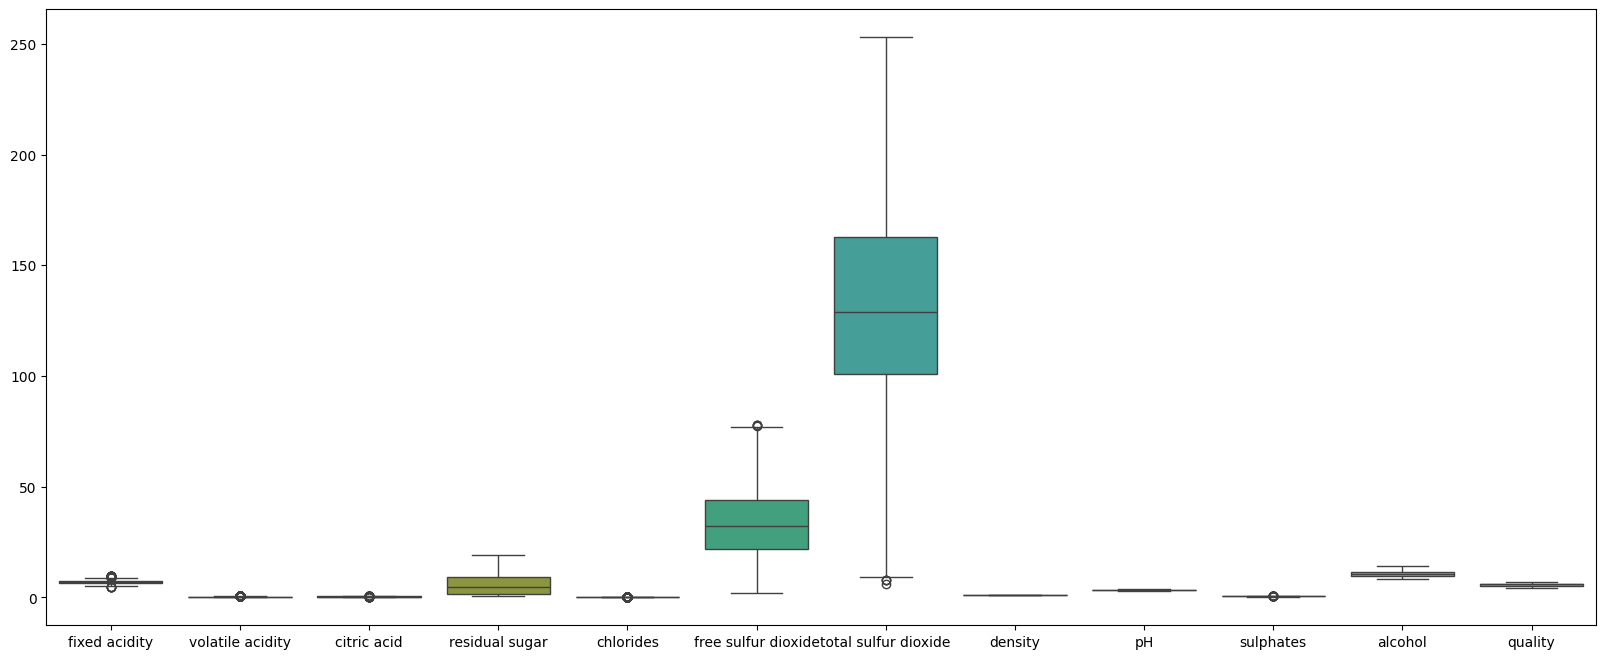

In [50]:
# Handling outliers

from matplotlib import pyplot as plt
import seaborn as sns

columns_with_outliers = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_no_outliers = remove_outliers_iqr(df, columns_with_outliers)

# Verifying that outliers are removed
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_no_outliers[columns_with_outliers])
plt.show()

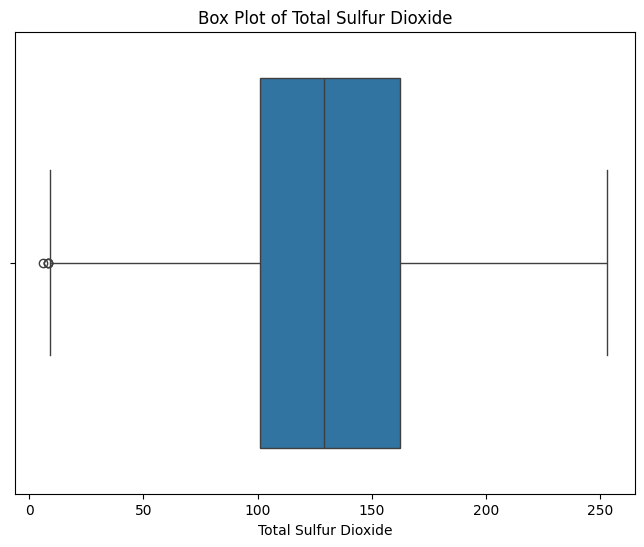

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_no_outliers is your DataFrame after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['total sulfur dioxide'])
plt.title('Box Plot of Total Sulfur Dioxide')
plt.xlabel('Total Sulfur Dioxide')
plt.show()

In [52]:
print(df['total sulfur dioxide'])
Q1 = df['total sulfur dioxide'].quantile(0.75)
Q3 = df['total sulfur dioxide'].quantile(0.25)

IQR = Q3 - Q1
print(IQR)

lower = Q1 - 1.5*IQR
print(lower)

out1=df[df['total sulfur dioxide'] < lower].values

df['total sulfur dioxide'].replace(out1,lower,inplace=True)

print(df['total sulfur dioxide'])

0       170.0
1       132.0
2        97.0
3       186.0
4       186.0
        ...  
6492     44.0
6493     51.0
6494     40.0
6495     44.0
6496     42.0
Name: total sulfur dioxide, Length: 6497, dtype: float64
-79.0
274.5
0       170.0
1       132.0
2        97.0
3       186.0
4       186.0
        ...  
6492     44.0
6493     51.0
6494     40.0
6495     44.0
6496     42.0
Name: total sulfur dioxide, Length: 6497, dtype: float64


In [53]:
print(df.columns)

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [54]:
#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder
df['fixed acidity']=pd.cut(df['fixed acidity'],3,labels=['0','1','2'])
df['volatile acidity']=pd.cut(df['volatile acidity'],3,labels=['0','1','2'])
df['citric acid']=pd.cut(df['citric acid'],3,labels=['0','1','2'])
df['total sulfur dioxide']=pd.cut(df['total sulfur dioxide'],3,labels=['0','1','2'])
df['density']=pd.cut(df['density'],3,labels=['0','1','2'])
df['pH']=pd.cut(df['pH'],3,labels=['0','1','2'])
df['sulphates']=pd.cut(df['sulphates'],3,labels=['0','1','2'])
df['alcohol']=pd.cut(df['alcohol'],3,labels=['0','1','2'])

In [55]:
print(df.head())

    type fixed acidity volatile acidity citric acid  residual sugar  \
0  white             0                0           0            20.7   
1  white             0                0           0             1.6   
2  white             1                0           0             6.9   
3  white             0                0           0             8.5   
4  white             0                0           0             8.5   

   chlorides  free sulfur dioxide total sulfur dioxide density pH sulphates  \
0      0.045                 45.0                    1       0  0         0   
1      0.049                 14.0                    0       0  1         0   
2      0.050                 30.0                    0       0  1         0   
3      0.058                 47.0                    1       0  1         0   
4      0.058                 47.0                    1       0  1         0   

  alcohol  quality  
0       0        6  
1       0        6  
2       0        6  
3       0     

In [57]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical variable 'type' using LabelEncoder
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

X = df.drop(['quality', 'type'], axis=1)  # Features excluding 'quality' and 'type'
Y = df['quality']  # Target variable 'quality'

# Initialize SelectKBest with chi2 score function
bestfeatures = SelectKBest(score_func=chi2, k='all')

# Fit SelectKBest to the data
fit = bestfeatures.fit(X, Y)

# Get the scores and names of features
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenating dataframes for better visualization
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

# Print the scores
print(featuresScores)

                   Specs       Score
0          fixed acidity   26.733773
1       volatile acidity  316.236894
2            citric acid   16.049916
3         residual sugar  224.945652
4              chlorides    6.388241
5    free sulfur dioxide  913.332832
6   total sulfur dioxide   93.138391
7                density    5.163611
8                     pH    2.805031
9              sulphates   32.897116
10               alcohol  840.641735
11          type_encoded   28.682885


[1.73728342e-02 1.50461650e-02 7.90015083e-03 2.85932104e-01
 2.79260037e-01 2.72650650e-01 1.20867160e-02 2.27216055e-04
 2.42819530e-02 7.93580508e-03 6.92269013e-02 8.07946726e-03]


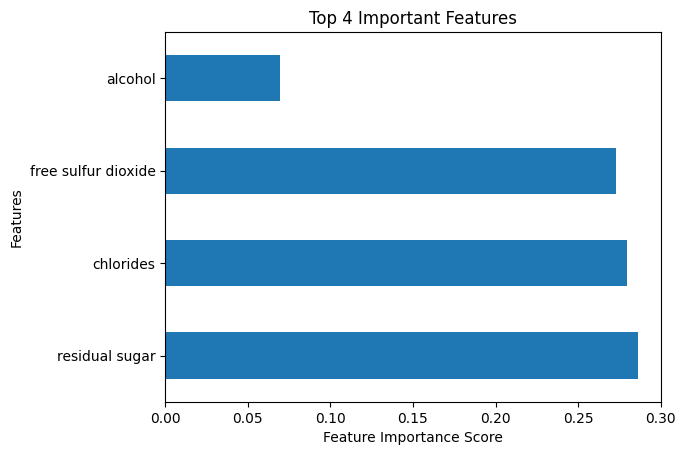

In [58]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = df.drop(['quality'], axis=1)
Y = df['quality']

model = ExtraTreesClassifier()

model.fit(X, Y)

print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)

feat_importance.nlargest(4).plot(kind='barh')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Top 4 Important Features")
plt.show()

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [60]:
df=pd.read_csv("winequality.csv")
print(df)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

In [64]:
import pandas as pd
x = df.drop(['type', 'fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'quality'], axis=1)
y = df['quality']

In [65]:

print("Features:\n")
print(x)

print("Target\n")
print(y)

Features:

      volatile acidity  residual sugar  free sulfur dioxide  sulphates  \
0                0.270            20.7                 45.0       0.45   
1                0.300             1.6                 14.0       0.49   
2                0.280             6.9                 30.0       0.44   
3                0.230             8.5                 47.0       0.40   
4                0.230             8.5                 47.0       0.40   
...                ...             ...                  ...        ...   
6492             0.600             2.0                 32.0       0.58   
6493             0.550             2.2                 39.0        NaN   
6494             0.510             2.3                 29.0       0.75   
6495             0.645             2.0                 32.0       0.71   
6496             0.310             3.6                 18.0       0.66   

      alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
... 

In [66]:
print("Splitting the data:\n")
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1,test_size=0.3)
print("Training data of x:\n",X_train)
print("Testing data of x:\n",X_test)
print("Training data of y:\n",y_train)
print("Testing data of y \n",y_test)

Splitting the data:

Training data of x:
       volatile acidity  residual sugar  free sulfur dioxide  sulphates  \
863               0.28             1.7                 24.0       0.50   
104               0.25            13.5                 52.0       0.44   
1764              0.27             8.0                 54.0       0.43   
1691              0.25            14.4                 55.0       0.38   
1344              0.23             1.9                 51.0       0.40   
...                ...             ...                  ...        ...   
905               0.19             1.6                  9.0       0.65   
5192              0.34             3.2                 17.0       0.81   
3980              0.22            12.1                 54.0       0.40   
235               0.23            14.3                 55.0       0.44   
5157              0.31             2.6                 14.0       0.80   

      alcohol  
863      12.1  
104       9.1  
1764      9.3  
1691 

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)
logr = LogisticRegression()
logr.fit(X_train_imputed, y_train)
X_test_imputed = imputer.transform(X_test)
y_pred = logr.predict(X_test_imputed)

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

logr = LogisticRegression(max_iter=1000)
logr.fit(X_train_scaled, y_train)
y_pred = logr.predict(X_test_scaled)

In [81]:
print(y_pred)

[6 6 6 ... 6 5 5]


In [82]:
print("Coefficients:\n",logr.coef_)
print("Intercepts:\n",logr.intercept_)

Coefficients:
 [[ 0.83895882 -0.21712466  0.43776661 -0.39521516 -0.43444362]
 [ 0.5022808  -0.2060566  -0.59760002 -0.32424122 -0.78961882]
 [ 0.31672132 -0.16961194 -0.10776313  0.01682517 -1.20481961]
 [-0.19620059  0.02967264 -0.08478609  0.25499307 -0.14554227]
 [-0.62639701  0.15900918 -0.11136007  0.45177746  0.62357692]
 [-0.51214651  0.3136197   0.22322908  0.32368168  0.96787094]
 [-0.32321682  0.09049169  0.24051361 -0.327821    0.98297647]]
Intercepts:
 [-1.94184107 -0.03525348  2.32116115  2.90510811  1.47509987 -0.47806887
 -4.24620571]


In [83]:
print("Accuracy_score:\n",accuracy_score(y_test,y_pred))
print("Classification_report:\n",classification_report(y_test,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy_score:
 0.5287179487179487
Classification_report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        60
           5       0.60      0.57      0.58       647
           6       0.50      0.73      0.59       837
           7       0.48      0.15      0.23       344
           8       0.00      0.00      0.00        56
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1950
   macro avg       0.23      0.21      0.20      1950
weighted avg       0.50      0.53      0.49      1950

Confusion matrix:
 [[  0   0   4   1   0   0   0]
 [  0   0  36  24   0   0   0]
 [  0   0 367 276   4   0   0]
 [  0   0 189 612  36   0   0]
 [  0   0  15 277  52   0   0]
 [  0   0   4  36  16   0   0]
 [  0   0   0   1   0   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
print(df.isnull().sum())

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [88]:
df_clean = df.dropna()
columns_to_clean = ['fixed acidity', 'volatile acidity', 'citric acid',
                    'residual sugar', 'chlorides', 'pH', 'sulphates']
df_clean = df.dropna(subset=columns_to_clean)

In [95]:
# 5. Random Forest: giving 97.77% accuracy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

x = df_clean.drop(['type', 'fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'quality'], axis=1)
y = df_clean['quality']

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.6591026302217637


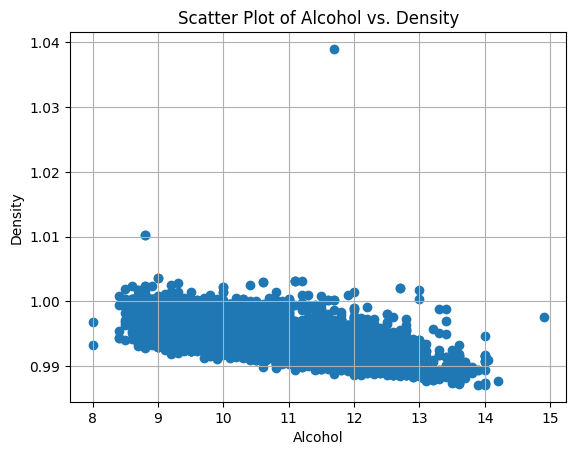

In [98]:
import matplotlib.pyplot as plt
plt.scatter(df['alcohol'], df['density'])
plt.title('Scatter Plot of Alcohol vs. Density')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.grid(True)
plt.show()


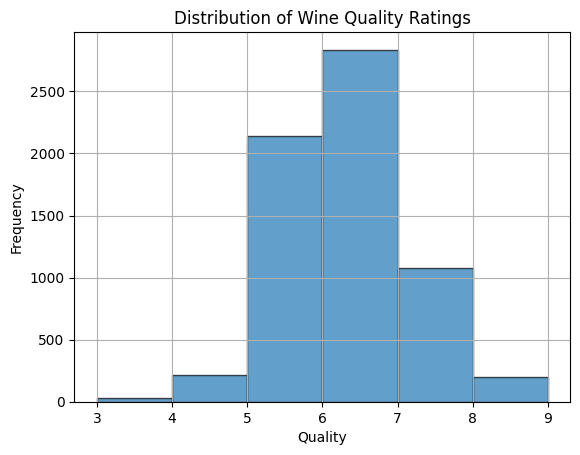

In [99]:
import matplotlib.pyplot as plt
plt.hist(df["quality"], bins=6, edgecolor='black', alpha=0.7)
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


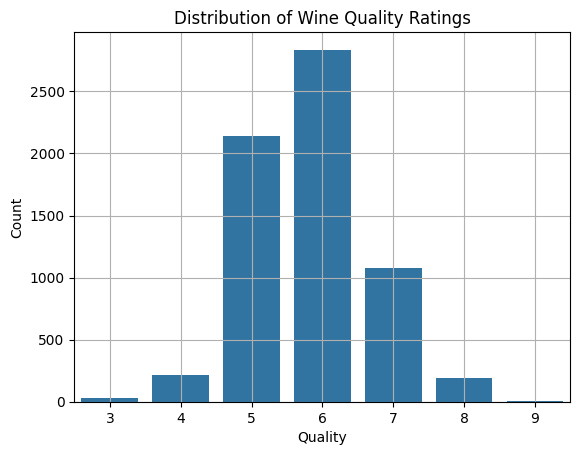

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

quality_counts = df["quality"].value_counts().sort_index()

sns.barplot(x=quality_counts.index, y=quality_counts.values)
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [101]:
type_counts = df["type"].value_counts()

In [102]:
print(type_counts)

type
white    4898
red      1599
Name: count, dtype: int64


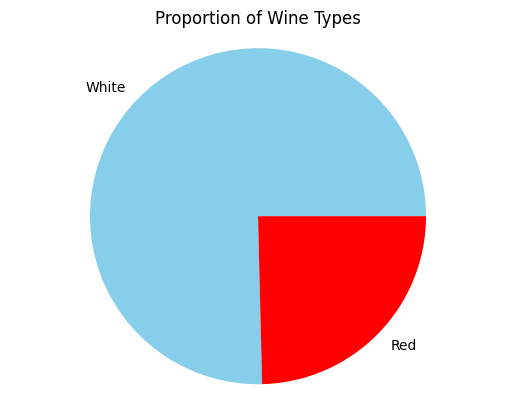

In [107]:
import matplotlib.pyplot as plt
labels = ['White', 'Red']
sizes = [4898, 1599]
colors = ['skyblue','red']

plt.pie(sizes, labels=labels, colors=colors)
plt.title('Proportion of Wine Types')
plt.axis('equal')
plt.show()

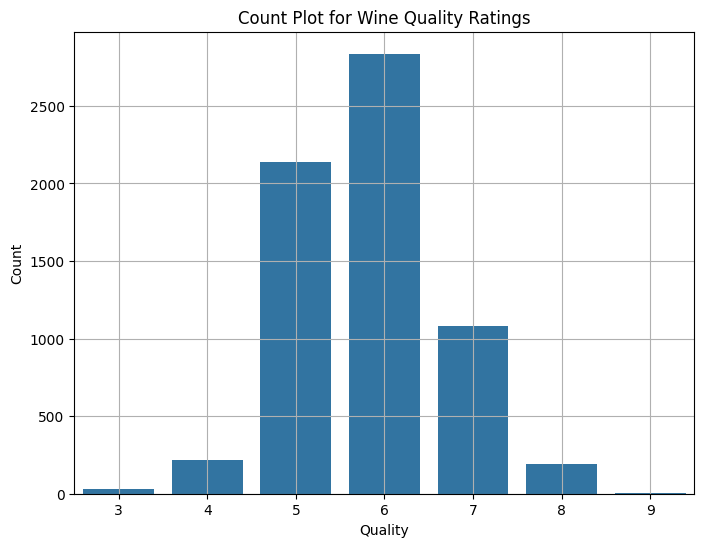

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title("Count Plot for Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.grid(True)
plt.show()


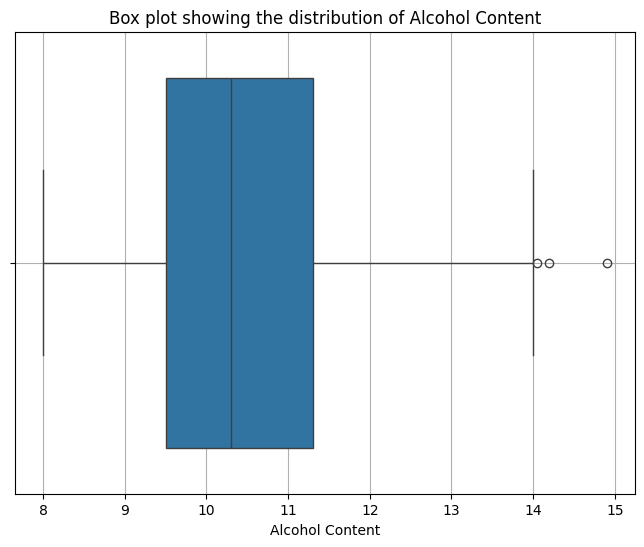

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='alcohol', data=df)
plt.title("Box plot showing the distribution of Alcohol Content")
plt.xlabel("Alcohol Content")
plt.grid(True)
plt.show()


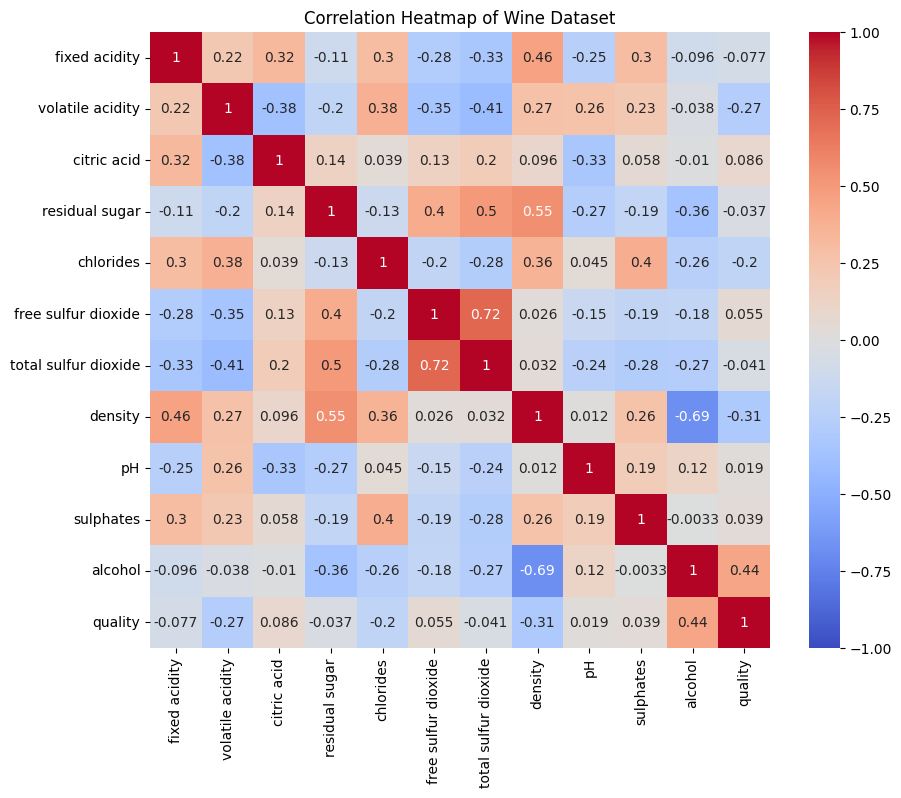

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Wine Dataset')
plt.show()

